In [3]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import requests
import json
import math

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


In [4]:

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Generic classification and optimization functions from last lab
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# clf - original classifier
# parameters - grid to search over
# X - usually your training X matrix
# y - usually your training y 
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Important parameters
# indf - Input dataframe
# featurenames - vector of names of predictors
# targetname - name of column you want to predict (e.g. 0 or 1, 'M' or 'F', 
#              'yes' or 'no')
# target1val - particular value you want to have as a 1 in the target
# mask - boolean vector indicating test set (~mask is training set)
# reuse_split - dictionary that contains traning and testing dataframes 
#              (we'll use this to test different classifiers on the same 
#              test-train splits)
# score_func - we've used the accuracy as a way of scoring algorithms but 
#              this can be more general later on
# n_folds - Number of folds for cross validation ()
# n_jobs - used for parallelization
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Plot tree containing only two covariates
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

from matplotlib.colors import ListedColormap
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def plot_2tree(ax, Xtr, Xte, ytr, yte, clf, plot_train = True, plot_test = True, lab = ['Feature 1', 'Feature 2'], mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    # Create a meshgrid as our test data
    plt.figure(figsize=(15,10))
    plot_step= 0.05
    xmin, xmax= Xtr[:,0].min(), Xtr[:,0].max()
    ymin, ymax= Xtr[:,1].min(), Xtr[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step), np.arange(ymin, ymax, plot_step) )

    # Re-cast every coordinate in the meshgrid as a 2D point
    Xplot= np.c_[xx.ravel(), yy.ravel()]


    # Predict the class
    Z = clfTree1.predict( Xplot )

    # Re-shape the results
    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    # Overlay training samples
    if (plot_train == True):
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    # and testing points
    if (plot_test == True):
        plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s")

    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.title("Boundary for decision tree classifier",fontsize=7.5)

In [5]:
#Import all data sources

#Twitter
with open("twitter_sentiment.json") as json_file:
    twitter = json.load(json_file)
    
#Distances
with open("distances.json") as json_file:
    distances = json.load(json_file)
    
#Geo-Cluster
with open("geo_cluster.json") as json_file:
    geo_cluster = json.load(json_file)
    
#Profession
with open("profession_dict.json") as json_file:
    professions = json.load(json_file)
    
#Wiki Info
wiki = pd.read_csv("contestantDF.csv")

#Date Guide
date_guide = pd.read_csv("date_guide.csv")

#Competition Data
with open("competition_data.json") as json_file:
    comp = json.load(json_file)

In [6]:
#Rename Wiki Dataframe - column elimination week
#If a winner - eliminated week 11, if runner-up - eliminated week 10
#If bachelor - eliminated week 0
#If season 13-14, if elimination week = 2-8, add 2

new_elim=  wiki['elimination week'].tolist()
new_elim = ['11' if qq=="Winner" else qq for qq in new_elim]
new_elim = ['10' if qq=="Runner-up" else qq for qq in new_elim]
new_elim = ['0' if qq=="bachelor" else qq for qq in new_elim]
new_elim = [qq.split(" ")[-1] for qq in new_elim]

all_seasons = wiki['season'].tolist()

good_elim = []

for elim, season in zip(new_elim, all_seasons):
    if season in [13,14] and int(elim) > 1 and int(elim) < 10:
        good_elim.append(str(int(elim)+2))
    else:
        good_elim.append(elim)
        
wiki["good_elim"] = good_elim

In [7]:
wiki.head()

,Unnamed: 0,age,elimination week,hometown,name,occupation,season,good_elim
0,0,25,Winner,"Dallas, Texas",Melissa Rycroft,Sales Representative,13,11
1,1,24,Runner-up,"Grand Rapids, Michigan",Molly Malaney,Department Store Buyer,13,10
2,2,29,7,"Peace River, Alberta",Jillian Harris,Interior Designer,13,9
3,3,24,6,"Carlsbad, California",Naomi Rose Crespo,Flight Attendant,13,8
4,4,34,5,"Huntsville, Alabama",Stephanie Hogan,Single Mother & Medical Marketing Rep.,13,7


In [78]:
#Define a function to get all data for a certain week 
def get_week_data(which_week, early_episode):
    
    if which_week == 2:
        select_week = ["0", "1"]
    else:
        select_week = ["0"] + [str(qq) for qq in range(1,which_week)]
    week_contestants = wiki[~wiki['good_elim'].isin(select_week)]
    season_range=range(13,20)
    if early_episode:
        week_contestants = week_contestants[~wiki['season'].isin([13,14])]
        season_range = range(15,20)
    week_success = week_contestants['good_elim']!=str(which_week)
    all_bach = wiki[wiki['good_elim'] == "0"]
    
    #Get right episode dates
    right_dates = date_guide[date_guide['Episode']==which_week]
    right_dates = right_dates[right_dates['Season'].isin(season_range)]

    #Get all data sources from libraries
    distances_series = []
    geo_series = []
    profession_series = []
    age_diff_series = []
    num_tweets = []
    tweet_sent = []
    group_rose = []
    date_rose = []
    group_date = []
    total_roses_season = []
    total_season_tweets = dict(zip(season_range, np.zeros(len(season_range))))
    for season, cname, cage in zip(week_contestants['season'],week_contestants['name'], \
                                  week_contestants['age']):
        #Get distances / spatial cluster
        distances_series.append(distances[str(season)][cname])
        geo_series.append(geo_cluster[str(season)][cname])

        #Get profession
        profession_series.append(professions[str(season)][cname])

        #Get Age Difference
        age_diff_series.append(int(all_bach[all_bach["season"]==season]["age"]) - int(cage))

        #Get Twitter Data
        tname = cname.split(" ")[0]
        try:
            episode = right_dates[right_dates['Season']==season]['Date'].tolist()[0]
            right_tweets = twitter[str(season)][tname][str(episode)]
            num_tweets.append(right_tweets["ntweet"])
            tweet_sent.append(right_tweets["sentiment"])
            total_season_tweets[season] = total_season_tweets[season] + right_tweets["ntweet"]
        except:
            num_tweets.append(0)
            tweet_sent.append(0)
            
        #Get competition Data
        season_dat = wiki[wiki['season'] == season].copy()
        season_dat['firstname'] = [qq.split(" ")[0] for qq in season_dat['name'].tolist()]
        first_names_all = season_dat['name'].groupby(season_dat['firstname']).count()
        first_names = dict(zip(first_names_all.index.tolist(), first_names_all.tolist()))
        
        if first_names[tname] == 2:
            comp_name = cname.split(" ")[0] + " " + cname.split(" ")[1][0]
        else:
            comp_name = tname
        
        if which_week != 2:
            try:
                daters = comp[str(season)][str(which_week - 1)].keys()
                if comp_name in daters:
                    contestant_date = comp[str(season)][str(which_week - 1)][comp_name]
                    print contestant_date.keys()
                    if "grou" in contestant_date.keys()[0]:
                        
                        group_date.append(1)
                        date_rose.append(0)
                        if contestant_date.values() == True:
                            group_rose.append(1)
                        else:
                            group_rose.append(0)
                    else:
                        group_date.append(0)
                        group_rose.append(0)
                        if contestant_date.values()[0] == True:
                            date_rose.append(1)
                        else:
                            date_rose.append(0)
                else:
                    group_date.append(0)
                    group_rose.append(0)
                    date_rose.append(0)
            except:
                group_date = np.zeros(len(num_tweets))
                group_rose = np.zeros(len(num_tweets))
                date_rose = np.zeros(len(num_tweets))
                
        else:
            group_date = np.zeros(len(num_tweets))
            group_rose = np.zeros(len(num_tweets))
            date_rose = np.zeros(len(num_tweets))
                    
    #Get Tweet Share - i.e. proportion of contestant tweets to total tweets / episode
    tweet_share = []
    for season, ntweet in zip(week_contestants['season'], num_tweets):
        tweet_share.append(ntweet/float(total_season_tweets[season]))

    #Get raw age of each contestant
    age_series = week_contestants['age']

    #Normalize distances
    def normal_func(a_series):
        meanval = np.mean(a_series)
        sdval = np.std(a_series)
        return [(qq - meanval) / sdval for qq in a_series]

    distances_norm = normal_func(distances_series)

    #Put data into pandas dataframe
    week_data = pd.DataFrame({"SUCCESS": week_success, "DIST": distances_series, \
                               "GEO": geo_series, "PROF":profession_series, \
                               "AGE_DIFF":age_diff_series, "AGE":age_series, \
                               "DIST_NORM": distances_norm, "TSENT": tweet_sent, \
                              "TWEET_SHARE": tweet_share, "GROSE": group_rose, \
                             "GDATE": group_date, "ODATE": date_rose})
    
    return week_data, week_success


In [79]:
week6_data, week6_success = get_week_data(6, True)
#week6_data

[u'group:']
[u'group:']
[u'group:']
[u'group:']
[u'group:']
[u'group:']
[u'group:']
[u'group:']
[u'one-on-one:']
[u'group:']
[u'group:']
[u'group:']
[u'group:']
[u'group:']
[u'group:']
[u'one-on-one:']
[u'group:']
[u'group:']
[u'group:']
[u'two-on-one:']
[u'group:']
[u'group:']
[u'group:']
[u'one-on-one']
[u'group']
[u'group']
[u'one-on-one']
[u'group']
[u'group']
[u'group']
[u'group']
[u'one-on-one']


In [28]:
np.mean(week6_data.SUCCESS)

0.69767441860465118

In [40]:
# Create test/train mask
itrain, itest = train_test_split(xrange(week6_data.shape[0]), train_size=0.6)
mask=np.ones(week6_data.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [41]:
# make sure we didn't get unlucky in our mask selection
print "Percentage of contestants that moved on in training set:", np.mean(week6_data.SUCCESS[mask])
print "Percentage of contestants that moved on in test set:", np.mean(week6_data.SUCCESS[~mask])

Percentage of contestants that moved on in training set: 0.68
Percentage of contestants that moved on in test set: 0.722222222222


In [76]:
from sklearn import tree
clfTree1 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}
clfTree1, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree1, parameters, week6_data, 
                                                     ['TWEET_SHARE', 'ODATE'],'SUCCESS', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask


/Users/hopemason/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'max_depth': 1, 'min_samples_leaf': 1} 0.965714285714 [mean: 0.96571, std: 0.05714, params: {'max_depth': 1, 'min_samples_leaf': 1}, mean: 0.96571, std: 0.05714, params: {'max_depth': 1, 'min_samples_leaf': 2}, mean: 0.96571, std: 0.05714, params: {'max_depth': 1, 'min_samples_leaf': 3}, mean: 0.96571, std: 0.05714, params: {'max_depth': 1, 'min_samples_leaf': 4}, mean: 0.96571, std: 0.05714, params: {'max_depth': 1, 'min_samples_leaf': 5}, mean: 0.96571, std: 0.05714, params: {'max_depth': 1, 'min_samples_leaf': 6}, mean: 0.96571, std: 0.05714, params: {'max_depth': 2, 'min_samples_leaf': 1}, mean: 0.96571, std: 0.05714, params: {'max_depth': 2, 'min_samples_leaf': 2}, mean: 0.96571, std: 0.05714, params: {'max_depth': 2, 'min_samples_leaf': 3}, mean: 0.96571, std: 0.05714, params: {'max_depth': 2, 'min_samples_leaf': 4}, mean: 0.96571, std: 0.05714, params: {'max_depth': 2, 'min_samples_leaf': 5}, mean: 0.96571, std: 0.05714, params: {'max_depth': 2, 'min_samples_leaf': 6}, mea

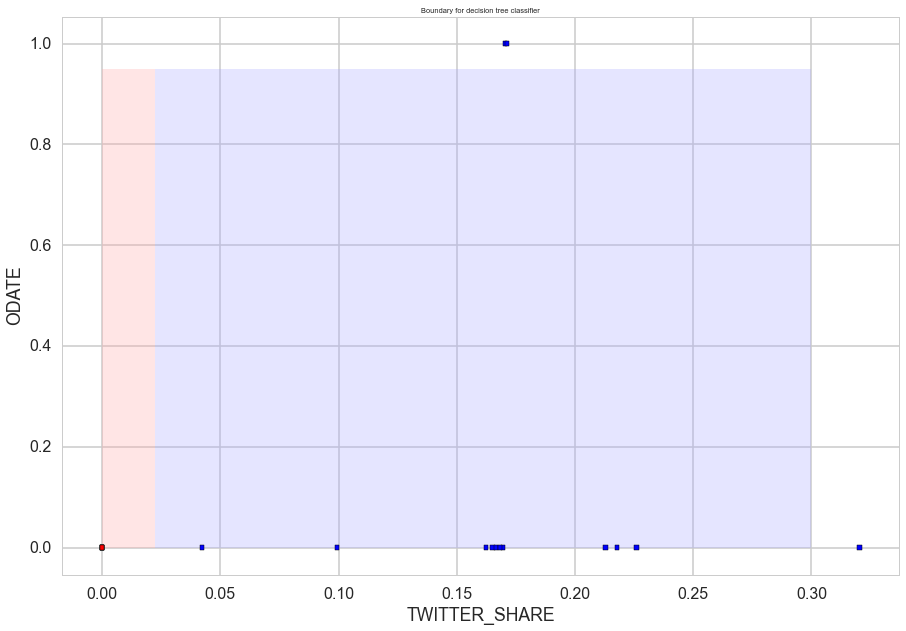

In [77]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['TWITTER_SHARE', 'ODATE'], alpha = 1, plot_train = False)

In [68]:
print Xnames
clfForest.feature_importances_

['AGE', 'AGE_DIFF', 'DIST', 'DIST_NORM', 'GDATE', 'GEO', 'GROSE', 'ODATE', 'PROF', 'TSENT', 'TWEET_SHARE']


array([ 0.03283397,  0.01959433,  0.15238456,  0.28135186,  0.03354978,
        0.03698023,  0.        ,  0.        ,  0.04332225,  0.25251659,
        0.14746642])

In [51]:

Xnames = week6_data.drop('SUCCESS', 1) 
Xnames = list(Xnames.columns.values)

from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       week6_data, Xnames, 'SUCCESS', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask


/Users/hopemason/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 7} 0.973333333333 [mean: 0.86667, std: 0.18459, params: {'n_estimators': 1}, mean: 0.88800, std: 0.13728, params: {'n_estimators': 2}, mean: 0.83771, std: 0.18348, params: {'n_estimators': 3}, mean: 0.66133, std: 0.32344, params: {'n_estimators': 4}, mean: 0.90571, std: 0.10202, params: {'n_estimators': 5}, mean: 0.96571, std: 0.05714, params: {'n_estimators': 6}, mean: 0.97333, std: 0.04444, params: {'n_estimators': 7}, mean: 0.92000, std: 0.13333, params: {'n_estimators': 8}, mean: 0.88514, std: 0.10258, params: {'n_estimators': 9}, mean: 0.94286, std: 0.06999, params: {'n_estimators': 10}, mean: 0.93714, std: 0.06999, params: {'n_estimators': 11}, mean: 0.93371, std: 0.08590, params: {'n_estimators': 12}, mean: 0.96571, std: 0.05714, params: {'n_estimators': 13}, mean: 0.96571, std: 0.05714, params: {'n_estimators': 14}, mean: 0.96571, std: 0.05714, params: {'n_estimators': 15}, mean: 0.88571, std: 0.19378, params: {'n_estimators': 16}, mean: 0.94000, std: 0.10

/Users/hopemason/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


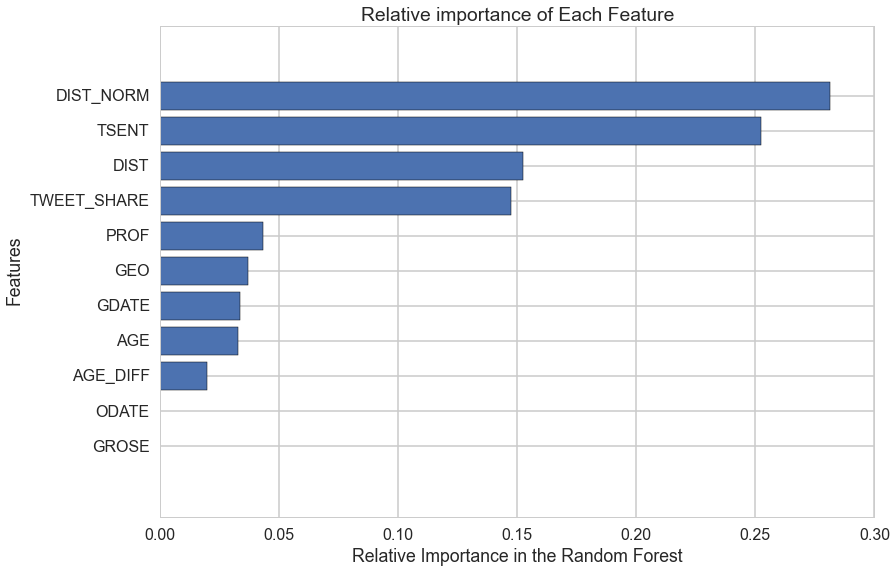

In [55]:
importance_list = clfForest.feature_importances_
name_list = Xnames
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

5.0


(array([ 38.,  14.,   8.,  20.,  10.,   1.,   5.,   0.,   0.,   2.]),
 array([ 0.        ,  0.02196262,  0.04392523,  0.06588785,  0.08785047,
         0.10981308,  0.1317757 ,  0.15373832,  0.17570093,  0.19766355,
         0.21962617]),
 <a list of 10 Patch objects>)

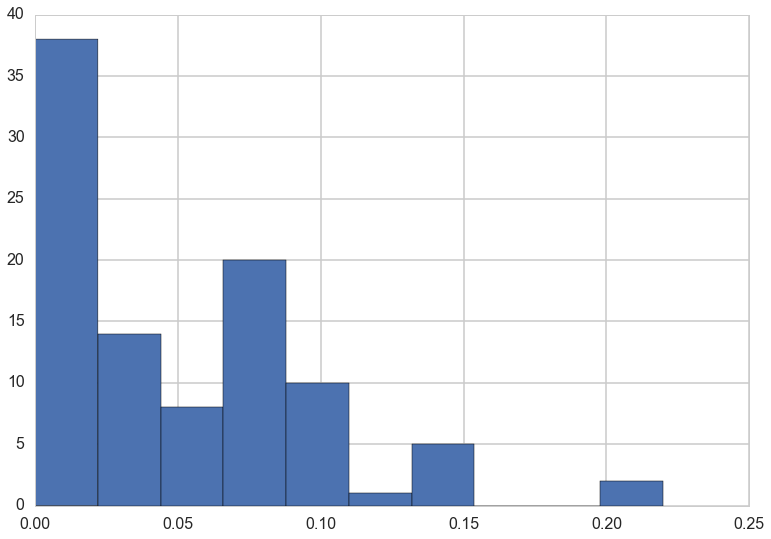

In [13]:
print week2_data.TWEET_SHARE.sum()
plt.hist(week2_data.TWEET_SHARE.values)

In [74]:
#= wiki[wiki['elimination week'] == 'Winner']
#winners
wiki.head(60)

,Unnamed: 0,age,elimination week,hometown,name,occupation,season,good_elim
0,0,25,Winner,"Dallas, Texas",Melissa Rycroft,Sales Representative,13,11
1,1,24,Runner-up,"Grand Rapids, Michigan",Molly Malaney,Department Store Buyer,13,10
2,2,29,7,"Peace River, Alberta",Jillian Harris,Interior Designer,13,9
3,3,24,6,"Carlsbad, California",Naomi Rose Crespo,Flight Attendant,13,8
4,4,34,5,"Huntsville, Alabama",Stephanie Hogan,Single Mother & Medical Marketing Rep.,13,7
5,5,27,4,"Marlboro, New Jersey",Lauren Wanger,Teacher,13,6
6,6,25,4,"Sewickley, Pennsylvania",Megan Parris,Single Mother and Lacrosse Coach,13,6
7,7,29,4,"Marshall, Missouri",Shannon Bair,Dental Hygienist,13,6
8,8,29,4,"Blue Island, Illinois","Nicole ""Nikki"" Kaapke",Administrative Assistant,13,6
9,9,25,3,"Monroe, Connecticut",Erica,Account Executive,13,5


In [ ]:
#Define a function to get all data for a certain week 
def get_aggregate_data(wiki_DF):
    df = wiki_DF[]
    if which_week == 2:
        select_week = ["0", "1"]
    else:
        select_week = ["0"] + [str(qq) for qq in range(1,which_week)]
    week_contestants = wiki[~wiki['good_elim'].isin(select_week)]
    season_range=range(13,20)
    if early_episode:
        week_contestants = week_contestants[~wiki['season'].isin([13,14])]
        season_range = range(15,20)
    week_success = week_contestants['good_elim']!=str(which_week)
    all_bach = wiki[wiki['good_elim'] == "0"]
    
    #Get right episode dates
    right_dates = date_guide[date_guide['Episode']==which_week]
    right_dates = right_dates[right_dates['Season'].isin(season_range)]

    #Get all data sources from libraries
    distances_series = []
    geo_series = []
    profession_series = []
    age_diff_series = []
    num_tweets = []
    tweet_sent = []
    group_rose = []
    date_rose = []
    group_date = []
    total_roses_season = []
    total_season_tweets = dict(zip(season_range, np.zeros(len(season_range))))
    for season, cname, cage in zip(week_contestants['season'],week_contestants['name'], \
                                  week_contestants['age']):
        #Get distances / spatial cluster
        distances_series.append(distances[str(season)][cname])
        geo_series.append(geo_cluster[str(season)][cname])

        #Get profession
        profession_series.append(professions[str(season)][cname])

        #Get Age Difference
        age_diff_series.append(int(all_bach[all_bach["season"]==season]["age"]) - int(cage))

        #Get Twitter Data
        tname = cname.split(" ")[0]
        try:
            episode = right_dates[right_dates['Season']==season]['Date'].tolist()[0]
            right_tweets = twitter[str(season)][tname][str(episode)]
            num_tweets.append(right_tweets["ntweet"])
            tweet_sent.append(right_tweets["sentiment"])
            total_season_tweets[season] = total_season_tweets[season] + right_tweets["ntweet"]
        except:
            num_tweets.append(0)
            tweet_sent.append(0)
            
        #Get competition Data
        season_dat = wiki[wiki['season'] == season].copy()
        season_dat['firstname'] = [qq.split(" ")[0] for qq in season_dat['name'].tolist()]
        first_names_all = season_dat['name'].groupby(season_dat['firstname']).count()
        first_names = dict(zip(first_names_all.index.tolist(), first_names_all.tolist()))
        
        if first_names[tname] == 2:
            comp_name = cname.split(" ")[0] + " " + cname.split(" ")[1][0]
        else:
            comp_name = tname
        
        if which_week != 2:
            try:
                daters = comp[str(season)][str(which_week - 1)].keys()
                if comp_name in daters:
                    contestant_date = comp[str(season)][str(which_week - 1)][comp_name]
                    if "grou" in contestant_date.keys()[0]:
                        group_date.append(1)
                        date_rose.append(0)
                        if contestant_date.values() == True:
                            group_rose.append(1)
                        else:
                            group_rose.append(0)
                    else:
                        group_date.append(0)
                        group_rose.append(0)
                        if contestant_date.values()[0] == True:
                            date_rose.append(1)
                        else:
                            date_rose.append(0)
                else:
                    group_date.append(0)
                    group_rose.append(0)
                    date_rose.append(0)
            except:
                group_date = np.zeros(len(num_tweets))
                group_rose = np.zeros(len(num_tweets))
                date_rose = np.zeros(len(num_tweets))
                
        else:
            group_date = np.zeros(len(num_tweets))
            group_rose = np.zeros(len(num_tweets))
            date_rose = np.zeros(len(num_tweets))
                    
    #Get Tweet Share - i.e. proportion of contestant tweets to total tweets / episode
    tweet_share = []
    for season, ntweet in zip(week_contestants['season'], num_tweets):
        tweet_share.append(ntweet/float(total_season_tweets[season]))

    #Get raw age of each contestant
    age_series = week_contestants['age']

    #Normalize distances
    def normal_func(a_series):
        meanval = np.mean(a_series)
        sdval = np.std(a_series)
        return [(qq - meanval) / sdval for qq in a_series]

    distances_norm = normal_func(distances_series)

    #Put data into pandas dataframe
    week_data = pd.DataFrame({"SUCCESS": week_success, "DIST": distances_series, \
                               "GEO": geo_series, "PROF":profession_series, \
                               "AGE_DIFF":age_diff_series, "AGE":age_series, \
                               "DIST_NORM": distances_norm, "TSENT": tweet_sent, \
                              "TWEET_SHARE": tweet_share, "GROSE": group_rose, \
                             "GDATE": group_date, "ODATE": date_rose})
    
    return week_data, week_success


In [71]:
date_guide.head()

,Unnamed: 0,Season,Episode,Date
0,0,1,1,2002-03-25
1,1,1,2,2002-04-01
2,2,1,3,2002-04-08
3,3,1,4,2002-04-15
4,4,1,5,2002-04-22
